## EPP CW3: Top Quark Mass  
Ross Herencia

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CW3_datafile.csv')
data = pd.concat([data.iloc[:, 0], data.iloc[:, 1:]/1000], axis=1) # Convert from MeV to GeV (except 'Event')
pd.options.display.max_columns = None
data

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,B2_Px,B2_Py,B2_Pz,J1_E,J1_Px,J1_Py,J1_Pz,J2_E,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz
0,0,51.2682,23.42740,-30.6944,33.72570,144.5390,30.556900,-124.6460,66.22110,41.3457,-36.84610,16.34040,7.131340,130.7900,-2.83964,83.1417,100.6900,153.5280,24.0491,36.26560,-147.189000,62.5720,-33.73380,-15.02080,-50.334600
1,8,62.6072,-55.92820,-27.4034,-6.38209,143.7200,-90.881300,80.1277,-76.67730,63.4233,16.40620,-58.00690,-18.648500,200.5600,163.96700,44.2282,104.7740,49.1016,37.1590,-12.96010,-28.853100,31.8049,-28.74360,11.80360,-0.203991
2,41,175.3180,110.07600,-128.7000,45.34120,209.6600,-110.486000,118.1740,-132.92900,54.2807,-18.82110,-23.77250,44.825500,41.0296,-13.01040,35.7258,-14.6192,82.1849,32.2120,13.28630,-73.960800,68.4105,8.93684,32.45350,59.377200
3,44,125.1260,32.67780,102.8470,63.33510,75.8262,-60.117000,-44.4106,1.58844,78.4043,42.06990,-48.63380,-44.018600,68.8639,-12.78190,62.4142,-24.6816,85.3715,-40.0729,-22.51000,71.706700,112.7220,19.21220,-19.28870,-109.245000
4,52,81.1701,45.96060,-38.9776,-54.37780,209.6140,-41.145200,31.8901,-202.90900,126.9130,3.28389,-25.30700,-124.202000,128.7970,22.57800,62.0562,-110.4760,168.4990,14.3085,42.06610,-162.219000,55.1707,9.47658,-26.69130,46.793300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,6584,68.2325,6.25010,-56.5225,37.70670,88.8687,-0.325446,-83.3943,-27.00450,58.8191,18.60380,49.88970,22.652000,349.3470,9.53882,77.9794,-340.1390,77.9623,-77.4649,-2.58302,-0.360271,125.8300,6.80578,-33.35040,-120.887000
445,6604,43.2189,34.49270,-25.1568,6.72650,151.6180,78.273700,-14.7141,-128.55200,31.8378,-12.02860,-29.10240,-0.352093,102.9460,-68.21310,60.7518,46.9291,111.2820,-23.1342,16.76250,-107.339000,62.7746,-8.35632,25.01500,56.867100
446,6641,86.8853,-7.55755,-31.2399,-80.72180,114.0240,26.492500,-101.5320,-43.49870,84.4457,-60.72640,46.63800,34.094900,203.3220,-39.11970,96.8167,174.3070,110.7150,-70.1994,21.33740,82.835000,99.8774,29.60090,55.90190,77.154900
447,6643,81.8717,-50.16130,36.0925,-53.70420,143.2070,-9.970380,-51.2313,133.14100,58.7077,-1.30046,48.37490,-32.858100,58.0969,42.34080,-11.9901,37.3212,40.3050,33.9515,-18.56140,9.399270,82.5559,35.93260,-4.99697,73.852600


In [3]:
def reconstruct(df, particles, label):
    selection1 = particles[0]
    selection2 = particles[1]
    E1 = selection1.iloc[:, 0]
    Px1 = selection1.iloc[:, 1]
    Py1 = selection1.iloc[:, 2]
    Pz1 = selection1.iloc[:, 3]
    E2 = selection2.iloc[:, 0]
    Px2 = selection2.iloc[:, 1]
    Py2 = selection2.iloc[:, 2]
    Pz2 = selection2.iloc[:, 3]
    
    E = E1 + E2
    Px = Px1 + Px2
    Py = Py1 + Py2
    Pz = Pz1 + Pz2
    
    m = np.sqrt((E)**2 - (Px)**2 - (Py)**2 - (Pz)**2)
    temp = pd.DataFrame({f'E_{label}': E, f'Px_{label}': Px, f'Py_{label}': Py, f'Pz_{label}': Pz, f'm_{label}': m})
    df = pd.concat([df, temp], axis=1)
    
    return df

def reconstruct_top(df, label, b1=False, b2=False):
    w = df.iloc[:, 25:29]
    if b1:
        b1 = df.iloc[:, 5:9]
        df = reconstruct(df, (b1, w), label='b1'+label)
        bjj = df[df[f'm_b1{label}'] < 250.0] # top mass < 250 GeV
    if b2:
        b2 = df.iloc[:, 9:13]
        df = reconstruct(df, (b2, w), label='b2'+label)
        bjj = df[df[f'm_b2{label}'] < 250.0]
    
    return bjj    

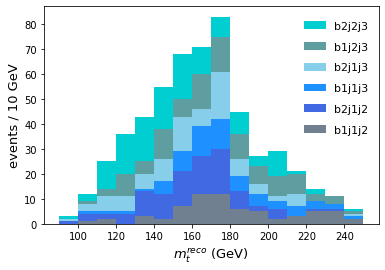

In [4]:
_ = data.iloc[:, 1:5] # muon - not used
b1 = data.iloc[:, 5:9]
b2 = data.iloc[:, 9:13]
j1 = data.iloc[:, 13:17]
j2 = data.iloc[:, 17:21]
j3 = data.iloc[:, 21: 25]

lowerlim = 65
upperlim = 90

j1j2 = data.copy()
j1j2 = reconstruct(j1j2, (j1,j2), 'j1j2')
j1j2 = j1j2[(j1j2['m_j1j2'] >= lowerlim) & (j1j2['m_j1j2'] <= upperlim)] # cutting around the W mass

j1j3 = data.copy()
j1j3 = reconstruct(j1j3, (j1, j3), 'j1j3')
j1j3 = j1j3[(j1j3['m_j1j3'] >= lowerlim) & (j1j3['m_j1j3'] <= upperlim)]

j2j3 = data.copy()
j2j3 = reconstruct(j2j3, (j2, j3), 'j2j3')
j2j3 = j2j3[(j2j3['m_j2j3'] >= lowerlim) & (j2j3['m_j2j3'] <= upperlim)]

b1j1j2 = reconstruct_top(j1j2, 'j1j2', b1=True)
b2j1j2 = reconstruct_top(j1j2, 'j1j2', b2=True)
b1j1j3 = reconstruct_top(j1j3, 'j1j3', b1=True)
b2j1j3 = reconstruct_top(j1j3, 'j1j3', b2=True)
b1j2j3 = reconstruct_top(j2j3, 'j2j3', b1=True)
b2j2j3 = reconstruct_top(j2j3, 'j2j3', b2=True)

x = [b1j1j2['m_b1j1j2'], b2j1j2['m_b2j1j2'], b1j1j3['m_b1j1j3'], 
     b2j1j3['m_b2j1j3'], b1j2j3['m_b1j2j3'], b2j2j3['m_b2j2j3']]
labels = ['b1j1j2', 'b2j1j2', 'b1j1j3', 'b2j1j3', 'b1j2j3', 'b2j2j3']
colours = ['slategray','royalblue', 'dodgerblue',  'skyblue', 'cadetblue', 'darkturquoise']
bins = 16

plt.hist(x, bins=bins, label=labels, stacked=True, histtype='bar', color=colours, range=(90, 250))
plt.xlabel(r'$m^{reco}_t$ (GeV)', fontsize=13.0)
plt.ylabel('events / 10 GeV', fontsize=13.0)
plt.legend(labelspacing=-2.8, bbox_to_anchor=(1.0, 0.50), frameon=False, fontsize=11.0)
plt.savefig('top_mass_1.png')
plt.show()

In [5]:
combined = pd.concat([b1j1j2, b1j1j3, b1j2j3, b2j1j2, b2j1j3, b2j2j3], axis=0)
combined

,Event,mu_E,mu_Px,mu_Py,mu_Pz,B1_E,B1_Px,B1_Py,B1_Pz,B2_E,B2_Px,B2_Py,B2_Pz,J1_E,J1_Px,J1_Py,J1_Pz,J2_E,J2_Px,J2_Py,J2_Pz,J3_E,J3_Px,J3_Py,J3_Pz,E_j1j2,Px_j1j2,Py_j1j2,Pz_j1j2,m_j1j2,E_b1j1j2,Px_b1j1j2,Py_b1j1j2,Pz_b1j1j2,m_b1j1j2,E_j1j3,Px_j1j3,Py_j1j3,Pz_j1j3,m_j1j3,E_b1j1j3,Px_b1j1j3,Py_b1j1j3,Pz_b1j1j3,m_b1j1j3,E_j2j3,Px_j2j3,Py_j2j3,Pz_j2j3,m_j2j3,E_b1j2j3,Px_b1j2j3,Py_b1j2j3,Pz_b1j2j3,m_b1j2j3,E_b2j1j2,Px_b2j1j2,Py_b2j1j2,Pz_b2j1j2,m_b2j1j2,E_b2j1j3,Px_b2j1j3,Py_b2j1j3,Pz_b2j1j3,m_b2j1j3,E_b2j2j3,Px_b2j2j3,Py_b2j2j3,Pz_b2j2j3,m_b2j2j3
2,41,175.3180,110.0760,-128.70000,45.34120,209.6600,-110.4860,118.1740,-132.92900,54.2807,-18.8211,-23.772500,44.82550,41.0296,-13.0104,35.7258,-14.6192,82.1849,32.2120,13.2863,-73.96080,68.4105,8.93684,32.45350,59.3772,123.2145,19.2016,49.0121,-88.5800,67.561152,332.8745,-91.2844,167.1861,-221.50900,159.546739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54,57.1123,-27.5482,-11.54340,48.67910,94.6043,75.8445,11.1259,54.93550,62.2657,-59.5592,14.900600,7.87556,188.5290,54.1783,52.8637,172.3730,76.8892,-33.4712,22.9952,64.84480,77.8688,-13.78520,-22.15740,73.2767,265.4182,20.7071,75.8589,237.2178,89.393398,360.0225,96.5516,86.9848,292.15330,165.451150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,113,78.3140,22.2024,-56.18360,49.83500,113.0490,-61.1895,-73.3499,58.95280,477.9140,-18.6111,92.801400,468.33300,255.6300,55.5980,60.9603,241.6550,80.1507,11.9171,-29.6121,73.26980,46.3349,21.38820,13.03210,-38.6650,335.7807,67.5151,31.3482,314.9248,89.610549,448.8297,6.3256,-42.0017,373.87760,244.661979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,217,106.2070,-56.0452,-28.54930,-85.57910,37.4202,34.7458,12.1989,-2.20637,45.0933,-33.1650,-14.551800,25.65660,77.8838,36.1298,58.2748,35.8094,112.8000,53.6823,18.3093,96.97710,49.5136,-12.43660,22.14150,42.2902,190.6838,89.8121,76.5841,132.7865,69.258352,228.1040,124.5579,88.7830,130.58013,107.625150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,239,124.5840,-25.6259,-35.39240,-116.66900,110.6250,69.5508,-14.6085,-84.43130,237.1410,4.6485,60.544800,-229.09900,65.0693,-18.7862,-39.2874,-48.1651,123.4590,-34.5256,23.5632,-115.98200,52.6510,-30.93380,26.45230,-32.7746,188.5283,-53.3118,-15.7242,-164.1471,74.224329,299.1533,16.2390,-30.3327,-248.57840,162.842556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,6179,36.0226,-34.8074,7.95965,4.76492,80.9000,-26.2735,71.9374,-23.53790,196.7160,-55.5769,-0.128566,-188.37700,145.3370,47.3077,-55.6821,-125.0860,42.5663,-27.9741,-29.1817,-11.16380,45.1879,38.33530,11.62390,-19.6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.7542,10.36120,-17.55780,-30.77510,79.611947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,284.4702,-45.21570,-17.686366,-219.15210,174.752352
431,6304,37.4519,-6.6611,31.81630,-18.60070,193.1070,17.5287,-67.6941,179.83100,53.2587,30.6746,-42.315400,4.62701,163.0260,87.3842,14.9594,136.2000,127.0460,-28.5494,67.2629,103.42000,51.0500,-6.02354,-28.01980,42.0845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.0960,-34.57294,39.24310,145.50450,88.381653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.3547,-3.89834,-3.072300,150.13151,175.9570

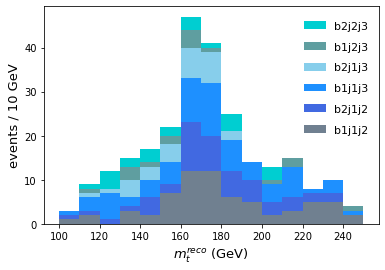

m_t = 172.79765933965126


In [6]:
c = combined[combined.Event.duplicated() == False]
c_b1j1j2 = c[c['m_b1j1j2'].notnull()]
c_b1j1j3 = c[c['m_b1j1j3'].notnull()]
c_b1j2j3 = c[c['m_b1j2j3'].notnull()]
c_b2j1j2 = c[c['m_b2j1j2'].notnull()]
c_b2j1j3 = c[c['m_b2j1j3'].notnull()]
c_b2j2j3 = c[c['m_b2j2j3'].notnull()]

x = [c_b1j1j2['m_b1j1j2'], c_b1j1j3['m_b1j1j3'], c_b1j2j3['m_b1j2j3'], 
     c_b2j1j2['m_b2j1j2'], c_b2j1j3['m_b2j1j3'], c_b2j2j3['m_b2j2j3']]
labels = ['b1j1j2', 'b2j1j2', 'b1j1j3', 'b2j1j3', 'b1j2j3', 'b2j2j3']
bins = 15

plt.hist(x, bins=bins, label=labels, stacked=True, histtype='bar', color=colours, range=(100, 250))
plt.xlabel(r'$m^{reco}_t$ (GeV)', fontsize=13.0)
plt.ylabel('events / 10 GeV', fontsize=13.0)
plt.legend(labelspacing=-2.8, bbox_to_anchor=(1.0, 0.50), frameon=False, fontsize=11.0)
plt.savefig('top_mass_2.png')
plt.show()

total_mass = 0
for i in x:
    total_mass += i.sum()
print('m_t =', total_mass/len(c))